CS 621 Foundation of Data Analytics
Module 12

Author:  Matthew Heino

Note:  Question 1and 2 may take a few minutes to run. Question 3 may take up to an hour.

In [1]:
from wordcloud import  WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag

import matplotlib.pyplot as plt
import string

In [2]:
# Read the results file
text = open('module_11_results.txt').read()

# Question 1

Create a wordcloud out of the dataset created from module 11. Name this image as wordcloud 1 and submit it. 
This wordcloud should contain stop words like 'the'.

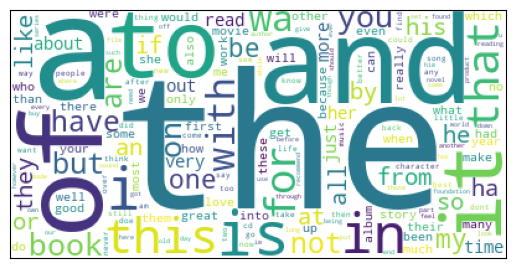

In [3]:
text_words =  text.split(" ")
distinct_words = list(set(text_words))

word_freq_dict = {key: 0 for  key in distinct_words}

for word in text_words:
        
        # increment the count
        word_freq_dict[word] = word_freq_dict[word] + 1

# Generate the WordCloud from frequencies.
new_word_cloud = WordCloud(background_color='white').generate_from_frequencies(word_freq_dict)

# Show the cloud as an image
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

plt.imshow(new_word_cloud)

# Write image to a file.
new_word_cloud.to_file('wordcloud 1.png')

# Question 2        

Remove the stop words first, then create another wordcloud. Name this image as wordcloud 2 and submit it. This wordcloud should contain adjective words like 'great'.

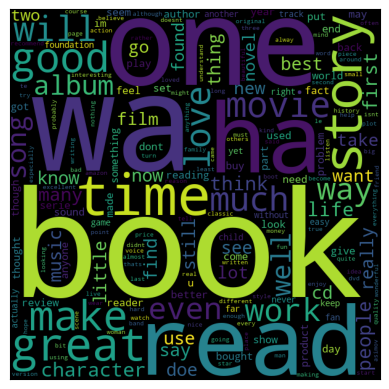

In [4]:
stop_words_wc = WordCloud(width=600, height=600,background_color='black').generate(text)

# Show the cloud as an image
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

plt.imshow(stop_words_wc)

# write image to a file
stop_words_wc.to_file('wordcloud 2.png')

# Question 3

Apply POS Tagging on the dataset and only keep words tagged with NN and NNP. Create one more wordcloud. Name this image as wordcloud 3 and submit it. The wordcloud should contain NN and NNP only.

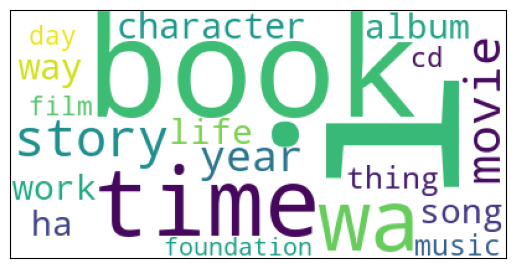

In [5]:
infile = open('module_11_results.txt')

# Load the data into a list
raw_text_list = []

infile.seek(0)

for line in infile:
    
    raw_text_list.append(line)

infile.close()

pos_tags = []
pos_nn = []
pos_nnp = []
both_nnp_nn_list = []

for sentence in raw_text_list:
    
    pos = pos_tag(word_tokenize(sentence))
    
    for index in range(0, len(pos)):
        
        if  pos[index][1] == 'NN':
            
            # add to the list of NN words
            pos_nn.append(pos[index][0])
            
        elif pos[index][1] == 'NNP':
            #print("NNP\n")
            pos_nnp.append(pos[index][0])           
            
# Join the two lists
both_nnp_nn_list = pos_nn + pos_nnp 
 
# Generate a list of distinct words
distinct_words = list(set(both_nnp_nn_list))


# to view the list of words
#with open('all_distinct.txt', 'w') as f:
#    for line in distinct_words:
#        f.write(f"{line}\n")

# Create a word count dictionary
word_freq_dict = {}

for word in distinct_words:
    word_freq_dict[word] = 0
    
# Compute the frequency of the word.
#for index in range(0, 10000): 
for index in range(0, len(distinct_words)):
    
    key_word = distinct_words[index]
    
    #if index % 1000 == 0:
    #    print("Key word: ", key_word, "  Index: ", index)
    
    count = 0
    
    for word in both_nnp_nn_list:
        
        if word == key_word:
            count += 1
    
    word_freq_dict[key_word] = count        

# Create the word cloud
wordcloud3 = WordCloud(max_font_size=200, stopwords=None, max_words=20
                       , background_color='White').generate_from_frequencies(word_freq_dict)


# Show the cloud as an image
plt.tick_params(top=False, bottom=False, left=False, right=False
                , labelleft=False, labelbottom=False)

plt.imshow(wordcloud3)

# Write image to a file.
wordcloud3.to_file('wordcloud 3.png')
